# Figures from: Idealised hydrodynamic simulations of turbulent oxygen-burning shell convection in $4 \pi$ geometry


In [1]:
import sys
sys.path.insert(0, '/user/jericho/PyPPM')
from ppmpy.ppm import *
%matplotlib nbagg
import nugridpy.mesa as ms
set_YProf_path('/data/ppm_rpod2/YProfiles/O-shell-M25/')

## Fig 1

<IPython.core.display.Javascript object>


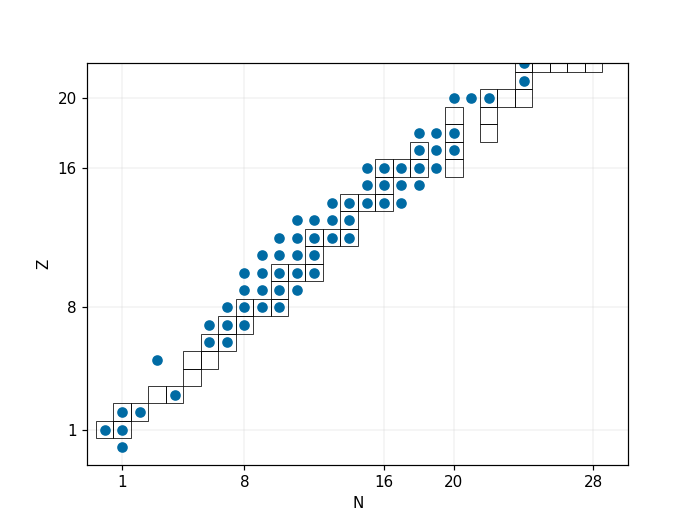

In [2]:
import matplotlib.patches as patches
from nugridpy.utils import colourblind as cb
import numpy as np
from matplotlib.pyplot import *

# network:
ZH = [0,1,1,2,2,3,5,6,6,21,22,26]
AH = [1,1,2,3,4,7,8,12,13,45,46,56]

Z = { 'n'  : 7,
      'o'  : 8,
      'f'  : 9,
      'ne' : 10,
      'na' : 11,
      'mg' : 12,
      'al' : 13,
      'si' : 14,
      'p'  : 15,
      's'  : 16,
      'cl' : 17,
      'ar' : 18,
      'k'  : 19,
      'ca' : 20,
      'sc' : 21,
      'ti' : 22,
      'fe' : 26 }

lines=open('./Fig.01/network.txt','r').readlines()
for line in lines:
    zn = line.split()[0]
    a1 = int(line.split()[1])
    a2 = int(line.split()[2])
    z = Z[zn]
    for i in range(a1,a2+1):
        ZH.append(z)
        AH.append(i)
    
ZH=np.array(ZH)
AH=np.array(AH)

figure()
plot(AH-ZH,ZH,'o',color=cb(5))

# stable nuclei
lines = open( './Fig.01/stable.dat', 'r' ).readlines()[1:]
z = [ int( l.split()[2] ) for l in lines ]
n = [ int( l.split()[3] ) for l in lines ]

ax = gca()
ax.set_aspect('equal')
for i in range(len(z)):
    ax.add_patch(
        patches.Rectangle(
            (n[i] - 0.5, z[i] - 0.5),   # (x,y)
            1.,          # width
            1.,          # height
            facecolor = 'None',
            lw = 0.5,
            zorder = 3,
            edgecolor = 'k'
        )
    )

magic = [1,8,16,20,28,40,50,82]
for j in magic:
    axvline( j, ls = '-', lw = 0.25, c = cb(7), zorder = 1)
    axhline( j, ls = '-', lw = 0.25, c = cb(7), zorder = 1 )
xticks( magic )
yticks( magic )


xlim(-1,30)
ylim(-1,22)

xlabel('N')
ylabel('Z')

## Fig 2

In [3]:
hd = ms.history_data('/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS')

Using old star.logsa file ...
 reading ...100% 



 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


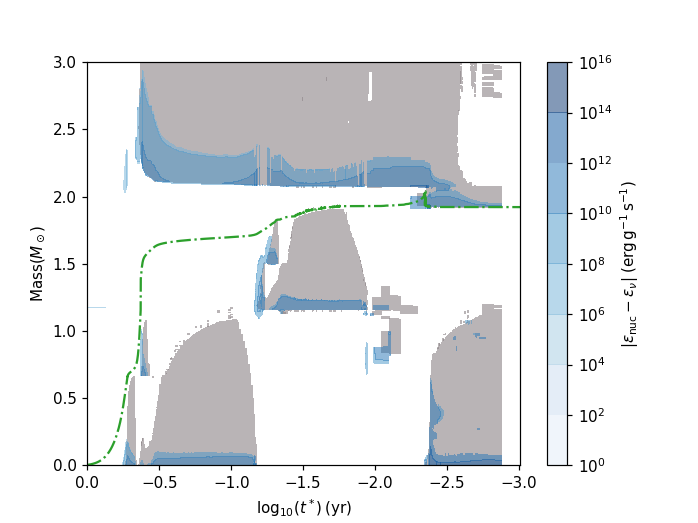

plot versus time left
plotting contours


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [4]:
hd.kip_cont(modstart = 16850, modstop = 36680, 
            xres = 1000, yres = 1000, ylims = [0.,3.], c12_boundary=True,
            outlines=False, ixaxis = 'log_time_left', plot_radius=False)

## Fig 3

In [2]:
mesa_model = ms.mesa_profile('/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS_N2b', 29350)
D1 = yprofile('/data/ppm_rpod2/YProfiles/O-shell-M25/D1')

240 in profiles.index file ...
Found and load nearest profile for cycle 29350
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS_N2b/log147.data ...
 reading ...100% 



<IPython.core.display.Javascript object>


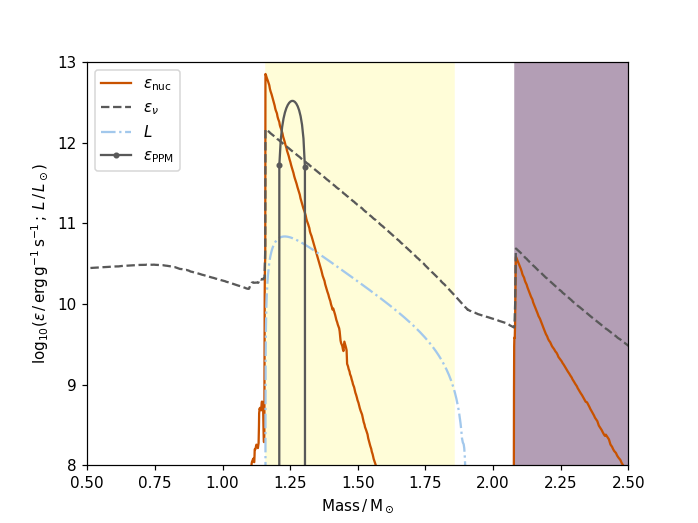

/user/jericho/PyPPM/ppmpy/ppm.py:6411: RuntimeWarning: invalid value encountered in log10
  eps_nuc = np.log10(p.get('eps_nuc'))
/user/jericho/PyPPM/ppmpy/ppm.py:6412: RuntimeWarning: divide by zero encountered in log10
  eps_neu = np.log10(p.get('non_nuc_neu'))


[  1.38660581e+01   1.38660581e+01   1.38660581e+01 ...,   5.85947152e-06
   2.80407454e-06   1.21149298e-06]


In [3]:
energy_comparison(D1,mesa_model, xthing = 'm',ifig = 2, silent = True,
                     range_conv1 = [1.1593, 1.8553],range_conv2 = [2.0824, 2.50],
                     xlim = [0.5,2.5] , ylim = [8,13], radbase = 4.1297, 
                     dlayerbot = 0.5, totallum = 20.153)

## Fig 4

In [4]:
import nugridpy.astronomy as ast
import nugridpy.utils as u
import nugridpy.mesa as ms
from matplotlib import gridspec

240 in profiles.index file ...
Found and load nearest profile for cycle 29350
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS_N2b/log147.data ...
 reading ...100% 



<IPython.core.display.Javascript object>


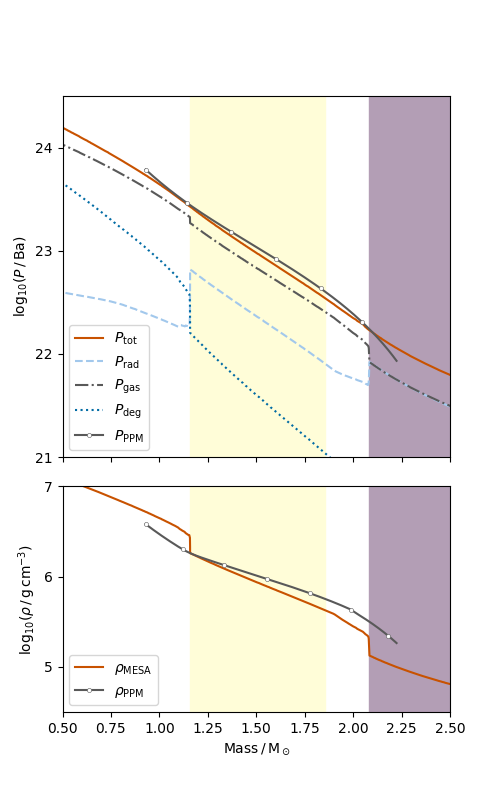

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in log10


In [5]:
p = ms.mesa_profile('/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS_N2b', 29350)

m  = p.get('mass')
mu = p.get('mu')
T  = 10.**p.get('logT')
Pppm = np.load( 'Fig.04/P_ppmsetup.npy' ) * 1.e19 # convert to barye
Mrppm = np.load( 'Fig.04/Mr_ppmsetup.npy' ) * 5.025e-07 # convert to Msun
rhoppm = np.load( 'Fig.04/rho_ppmsetup.npy' ) * 1.e3 # convert to g/cc

f = figure(figsize=(5, 8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1.6, 1]) 
ax1 = subplot(gs[0])
ax2 = subplot(gs[1], sharex=ax1)
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0.1)
setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

axes(ax1)
# plot simulation boundaries
rad1 = 3.0 # Mm
rad2 = 9.8 # Mm
rad  = 10. ** p.get('logR') * ast.rsun_cm / 1.e8
#print rad
idx1 = np.abs(rad - rad1).argmin()
idx2 = np.abs(rad - rad2).argmin()
m1   = m[idx1]
m2   = m[idx2]
#print m1, m2
cb = u.colourblind

# plot conv zone boundaries
rlconv = 1.1593
ruconv = 1.8553
fill_between( [ rlconv, ruconv ], 0, 100, color='#fffdd8' ) #'f3f3df' )

rlconv = 2.0824
ruconv = 2.50
fill_between( [ rlconv, ruconv ], 0, 100, color='#b39eb5' )

plot(m,p.get('logP'),
    label='$P_\mathrm{tot}$',
    color=cb(8),
    linestyle='-')

prad=ast.Prad(T,mu) # of course, the mu is not really used
plot(m,np.log10(prad),
    label='$P_\mathrm{rad}$',
    color=cb(0),
    linestyle='--')

rho= 10.**p.get('logRho')
pideal = ast.Pgas(rho,T,mu)
plot(m,np.log10(pideal),
    label='$P_\mathrm{gas}$',
    color=cb(4),
    linestyle='-.')

# use the difference:
pdeg = 10.** p.get('logP') - prad - pideal
plot(m,np.log10(pdeg),
    label='$P_\mathrm{deg}$',
    color=cb(5),
    linestyle=':')

plot( Mrppm[1:], np.log10(Pppm[1:]), linestyle='-', \
      marker='.', markevery=0.1, label='$P_\mathrm{PPM}$', \
      color=cb(4), mfc='w', mec=cb(4), mew=0.4 )

xlim(0.5,2.5)
#xlim(0.8,2.3)
ylim(20.5,24.5)


ylabel('$\log_{10}(P\,/\,\mathrm{Ba})$')

#legend(loc=(0.75,0.6))
legend(loc='lower left')

ax=gca()
ax.yaxis.set_ticks([21,22,23,24,25])
draw()
ylim(21,24.5)

axes(ax2)

plot(m,p.get('logRho'),
#plot(m,10.**p.get('logRho'),
    label='$\\rho_\mathrm{MESA}$',
    color=cb(8),
    linestyle='-')

plot( Mrppm[1:], np.log10(rhoppm[1:]), linestyle='-', \
#plot( Mrppm[1:], rhoppm[1:], linestyle='-', \
      marker='.', markevery=0.1,
      color=cb(4), mfc='w', mec=cb(4), mew=0.4,
      label='$\\rho_\mathrm{PPM}$' )

rlconv = 1.1593
ruconv = 1.8553
fill_between( [ rlconv, ruconv ], 0, 100, color='#fffdd8' ) #'#f3f3df' )

rlconv = 2.0824
ruconv = 2.50
fill_between( [ rlconv, ruconv ], 0, 100, color='#b39eb5' )

#legend(loc=(0.75,0.6))
legend(loc='lower left')
ylim(4.5,7)
yticks(np.linspace(5,7,3))
ylabel('$\log_{10}(\\rho\,/\,\mathrm{g\,cm}^{-3})$')
xlabel('$\mathrm{Mass\,/\,M}_\odot$')



# Fig 5

<IPython.core.display.Javascript object>


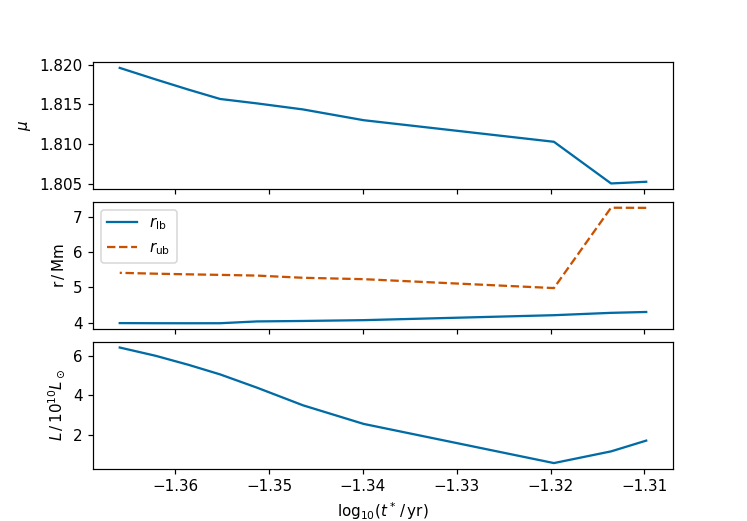

Using old star.logsa file ...
 reading ...100% 

reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log550.data ...
 reading ...100% 

reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log551.data ...
 reading ...100% 

Closing profile tool ...
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log552.data ...
 reading ...100% 

Closing profile tool ...
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log553.data ...
 reading ...100% 

Closing profile tool ...
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log554.data ...
 reading ...100% 

Closing profile tool ...
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log555.data ...
 reading ...100% 

Closing profile tool ...
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log556.data ...
 reading ...100% 

Closing profile tool ...
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS/log557.data ...
 reading ...100% 

C

In [2]:
plot_mesa_time_evo('/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS',
                   range(550,560),7.5829245098141646E+006,ifig=21)

## Fig 6

240 in profiles.index file ...
Found and load nearest profile for cycle 29350
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS_N2b/log147.data ...
 reading ...100% 



/user/jericho/PyPPM/ppm.py:6271: RuntimeWarning: invalid value encountered in divide
  nabla_rho = dlogrho/dlogp


<IPython.core.display.Javascript object>


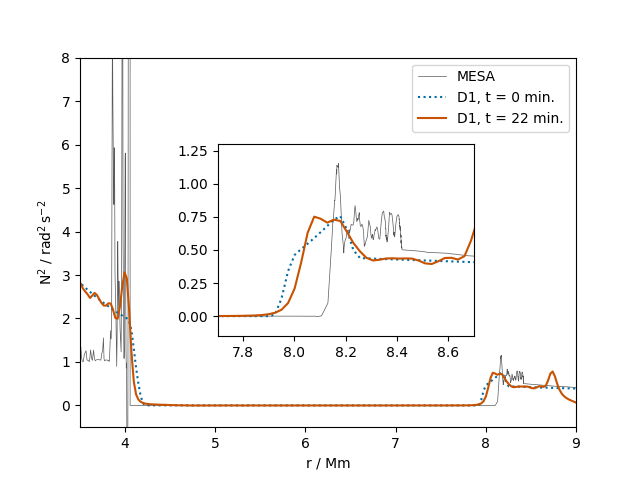

Closing profile tool ...


In [12]:
plot_N2('D1', 0, 132, lims1 = [3.5,9.,-0.5, 8.], lims2 = [7.7,8.7,-0.15,1.3], mesa_model_num = 29350)

## Fig 7

<IPython.core.display.Javascript object>


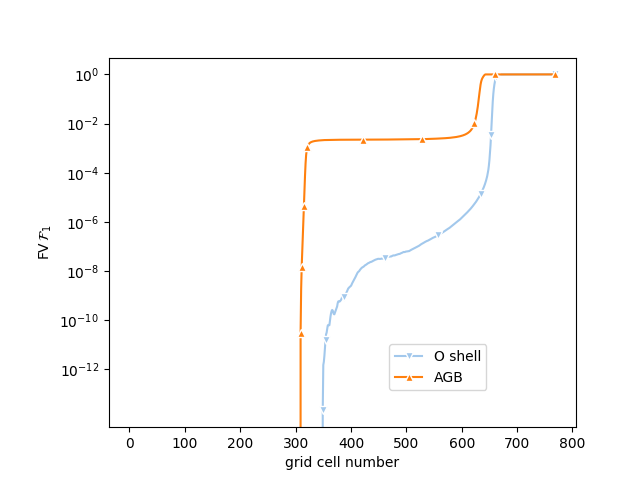

In [14]:
H1 = yprofile('/data/ppm_rpod2/YProfiles/agb-entrainment-convergence/H1')
D2 = yprofile('/data/ppm_rpod2/YProfiles/O-shell-M25/D2')
compare_entrained_material([H1,D2],['O shell','AGB'], fname = 271)

## Fig 11

<IPython.core.display.Javascript object>


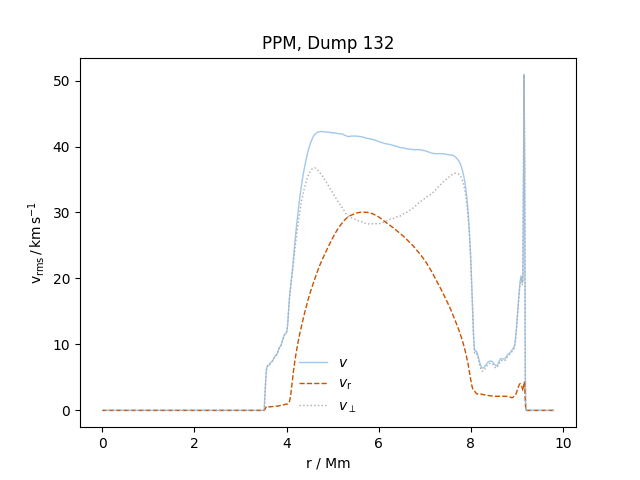

In [17]:
D2.vprofs( 132, initial_conv_boundaries = False, ifig = 11)

## Fig 12

<IPython.core.display.Javascript object>


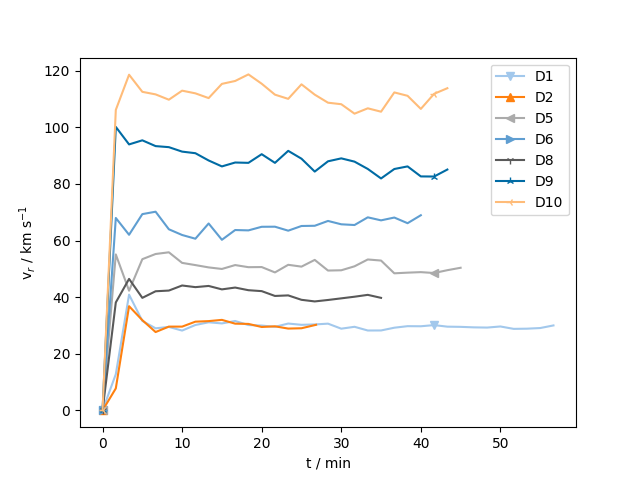

In [18]:
v_evolution(['D1','D2','D5','D6','D8','D9','D10'],4.,8.,'radial','max', sparse = 10, ifig = 12)

## Fig 14

<IPython.core.display.Javascript object>


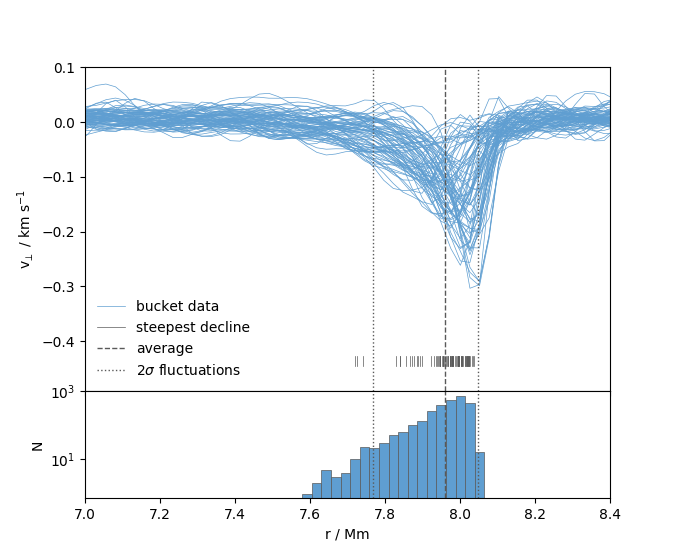

In [2]:
data_path = "/data/ppm_rpod2/RProfiles/O-shell-M25/D15/"
upper_bound_ut(data_path, 121, 101, 135,7.4,8.4, derivative = True)

## Fig 15

<IPython.core.display.Javascript object>


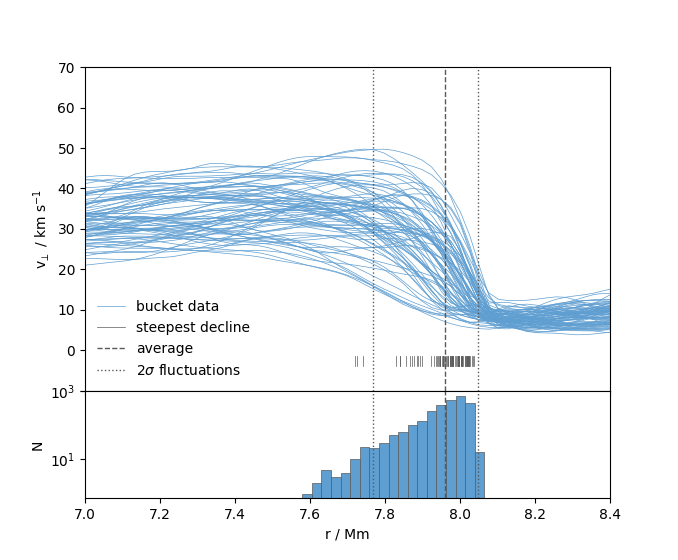

In [3]:
upper_bound_ut(data_path, 121, 101, 135,7.4,8.4, derivative = False)

## Fig 16

<IPython.core.display.Javascript object>


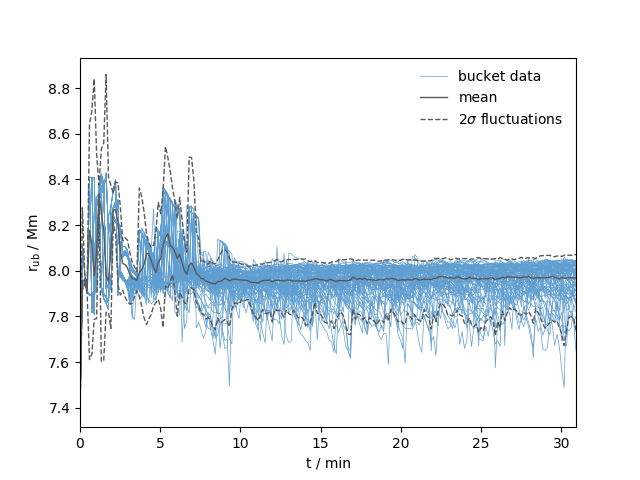

In [4]:
plot_boundary_evolution(data_path, 121, 7.4, 8.4, 700)

## Fig 17

In [ ]:
# Might not work needs a dependancy
data_path = "/rpod2/PPM/RProfiles/AGBTP_M2.0Z1.e-5/F4"
rp_set = rprofile.rprofile_set(data_path)
plot_Mollweide(rp_set,dump_min=100,dump_max=209,r1=7.4,r2=8.4)

## Fig 18

<IPython.core.display.Javascript object>


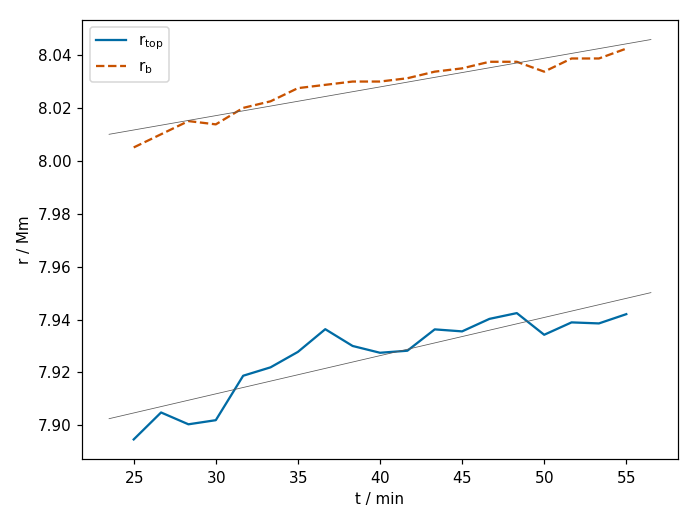

<IPython.core.display.Javascript object>


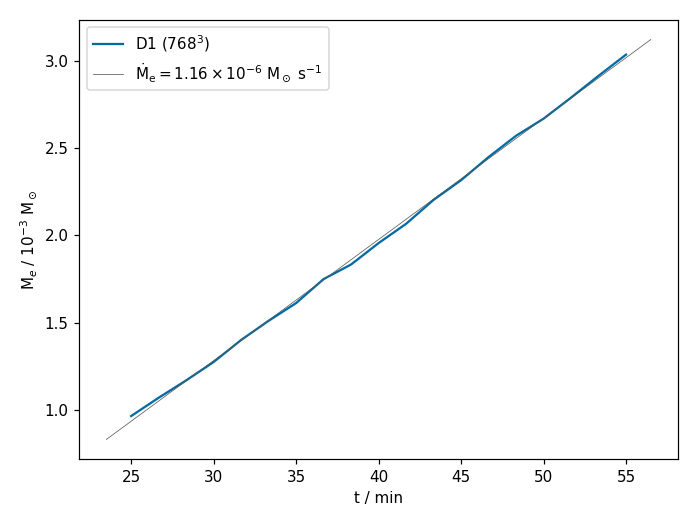

1.1568333893608769e-06

In [3]:
D1 = yprofile('/data/ppm_rpod2/YProfiles/O-shell-M25/D1')
D1.entrainment_rate(range(150, 332, 10), 7.5, 8.5, var = 'vxz',
                     criterion = 'min_grad', offset = -1.,
                     integrate_both_fluids = False, ifig0 = 18,
                     mdot_curve_label = r'D1 $\left( 768^3 \right)$')

## Fig 19

<IPython.core.display.Javascript object>


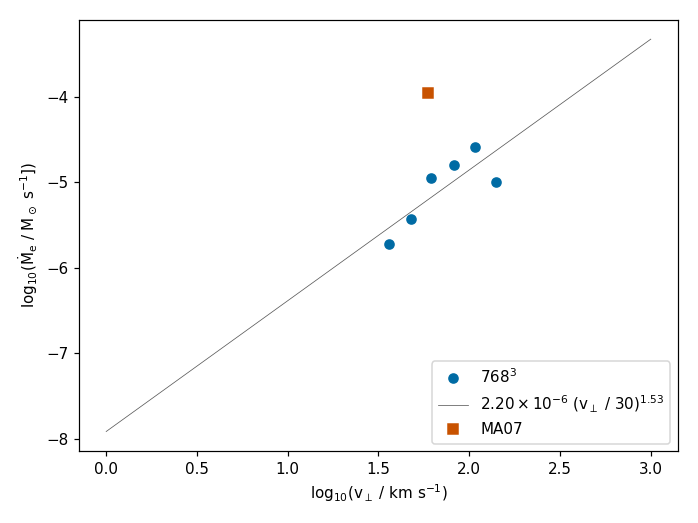

In [2]:
cases = ('D1', 'D8', 'D5', 'D6', 'D9', 'D10')
c0 = (241,154,142,155,123,78)  
plot_entr_v_ut(cases,c0,10,10,7.5,8.5,'tangential','max','$768^3$',ifig0 = 3,
                  integrate_both_fluids = False)

## Fig 20

<IPython.core.display.Javascript object>


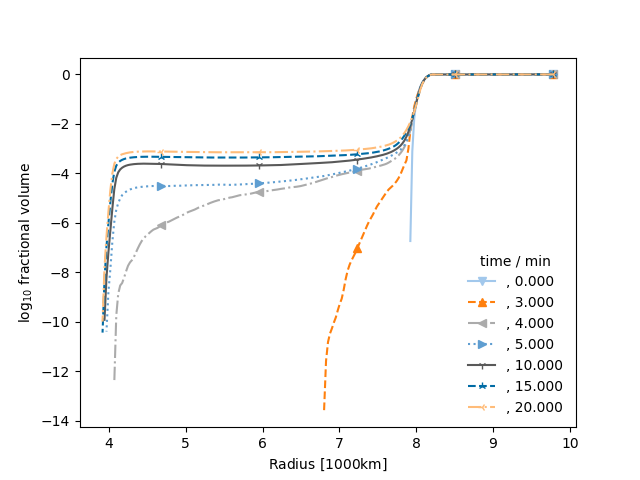

/user/jericho/PyPPM/ppm.py:1626: RuntimeWarning: divide by zero encountered in log10
  pl.plot(Y,np.log10(y),utils.linestyle(i+ls_offset)[0],


In [21]:
D1.prof_time([0,3,4,5,10,15,20],yaxis_thing = 'FV',
             logy=True,num_type='time',markevery = 50)

## Fig 21

/user/jericho/PyPPM/ppm.py:2534: RuntimeWarning: divide by zero encountered in divide
  Hp = - P[1:] * np.diff(r) / np.diff(P)


1386 in profiles.index file ...
Found and load nearest profile for cycle 28900
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02//LOGS/log593.data ...
 reading ...35%

/user/jericho/PyPPM/ppm.py:6837: RuntimeWarning: divide by zero encountered in divide
  Hp = - P[1:] * np.diff(r) * 1.e8 / np.diff(P)
/user/jericho/PyPPM/ppm.py:6839: RuntimeWarning: invalid value encountered in multiply
  Dav = (1./3.) * vav * alpha * Hp


 reading ...100% 



/user/jericho/PyPPM/ppm.py:6852: RuntimeWarning: invalid value encountered in multiply
  Dav2 = (1./3.) * vav * np.minimum(alpha * Hp,rtop*1.e8-r*1.e8)


<IPython.core.display.Javascript object>


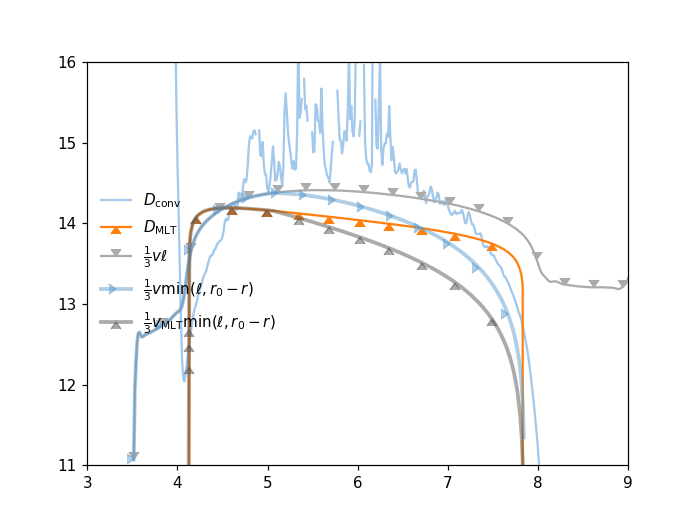

Closing profile tool ...


/user/jericho/PyPPM/ppm.py:6855: RuntimeWarning: divide by zero encountered in log10
  pl.plot(rrc,np.log10(DDc),color = cb(yy),markevery=markevery,\
/user/jericho/PyPPM/ppm.py:6855: RuntimeWarning: invalid value encountered in log10
  pl.plot(rrc,np.log10(DDc),color = cb(yy),markevery=markevery,\
/user/jericho/PyPPM/ppm.py:6862: RuntimeWarning: divide by zero encountered in log10
  pl.plot(r,np.log10(Dav),color = cb(yy),marker = ls(yy)[1], markevery=markevery,\
/user/jericho/PyPPM/ppm.py:6866: RuntimeWarning: divide by zero encountered in log10
  pl.plot(r,np.log10(Dav2),color = cb(yy),marker = ls(yy)[1],markevery=markevery,linewidth=2.5,alpha=0.5,\
/user/jericho/PyPPM/ppm.py:6866: RuntimeWarning: invalid value encountered in log10
  pl.plot(r,np.log10(Dav2),color = cb(yy),marker = ls(yy)[1],markevery=markevery,linewidth=2.5,alpha=0.5,\
/user/jericho/PyPPM/ppm.py:6869: RuntimeWarning: invalid value encountered in log10
  pl.plot(rm,np.log10(Davmes),color = cb(yy),marker = ls(yy)[1],ma

(11, 16)

In [2]:
plot_diffusion_profiles('D2','/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/',28900,
                        7.8489,(1,160),2.*460.,7.8282,10.**12.27,0.21,0.055,1.6)
pl.xlim(3,9)
pl.ylim(11,16)

## Fig 22

<IPython.core.display.Javascript object>


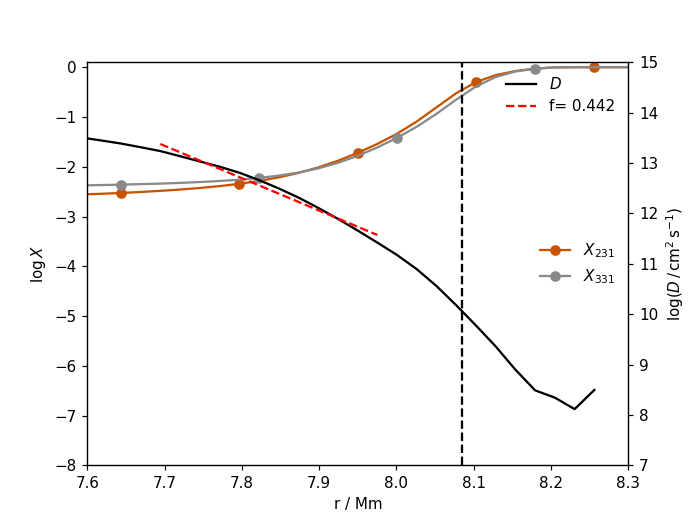

(7, 15)

In [10]:
D1.Dinv(231, 331, plot_Dlt0=False, approx_D = True, linelims = [7.7,8.0],
        r0= 6)
pl.xlim(7.6,8.3)
pl.ylim(7,15)

1.0